## Loading data 

In [ ]:
!pip install xlrd

In [ ]:
!pip install seaborn --upgrade

In [ ]:
!pip show seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

path = "New Bank_loan_data.xlsx"
df = pd.read_excel(path)

### First 5 rows of the dataset

In [3]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


### Last 5 rows of the dataset

In [4]:
df.tail()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,NaN,3,40.0,92697,1,1.9,3,0,NaN,0,0,0,1.0,0
4996,4997,30,NaN,4,15.0,92037,4,0.4,1,85,NaN,0,0,0,1.0,0
4997,4998,63,NaN,39,24.0,93023,2,0.3,3,0,NaN,0,0,0,0.0,0
4998,4999,65,NaN,40,49.0,90034,3,0.5,2,0,NaN,0,0,0,1.0,0
4999,5000,28,NaN,4,83.0,92612,3,0.8,1,0,NaN,0,0,0,1.0,1


### Shape of dataset

In [5]:
df.shape

(5000, 16)

This shows that the dataset has 5000 rows and 16 columns.

### Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


This shows some problem in age column where min age is 2 and maximum age is 978 which is not possible. So we need to drop the row with value 978.

### checking null values

In [8]:
df.isna().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [9]:
df.isna().sum()*100 / len(df)

ID                     0.00
Age                    0.00
Gender                31.92
Experience             0.00
Income                 1.34
ZIP Code               0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Home Ownership        23.78
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 0.80
CreditCard             0.00
dtype: float64

### handling missing values

In [10]:
columns = ['Income','Online']

In [11]:
df.dropna(subset=columns, inplace=True)

In [12]:
df.isna().sum()*100 / len(df)

ID                     0.000000
Age                    0.000000
Gender                32.604699
Experience             0.000000
Income                 0.000000
ZIP Code               0.000000
Family                 0.000000
CCAvg                  0.000000
Education              0.000000
Mortgage               0.000000
Home Ownership        24.290092
Personal Loan          0.000000
Securities Account     0.000000
CD Account             0.000000
Online                 0.000000
CreditCard             0.000000
dtype: float64

In [13]:
df.shape

(4895, 16)

In [14]:
df['Gender'].unique()

array(['M', 'F', 'O', nan, '#', '-'], dtype=object)

Since there is large number of missing values as well as garbage values, we drop the gender column.

In [15]:
df.drop(columns=["Gender"], axis=1, inplace=True)

Since the Home Ownership column might play a significant role on target value, we replace null values with the most frequent value.

In [16]:
df['Home Ownership'].mode()[0]

'Home Mortage'

In [17]:
df['Home Ownership'] = df['Home Ownership'].fillna(df['Home Ownership'].mode()[0])

In [18]:
df.isna().sum()*100 / len(df)

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Home Ownership        0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

### handling the inappropriate values in age column

In [19]:
df.drop(df[df["Age"] > 100].index, inplace=True)

In [20]:
df.shape

(4889, 15)

In [21]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000
mean,2507.230927,45.311720,20.102679,72.121906,93146.108816,2.387400,1.894160,1.872367,55.530374,0.104725,0.053999,0.596236,0.292084
std,1442.818777,11.546098,11.464405,45.022297,2125.924771,1.146248,1.708064,0.839925,99.568134,0.306230,0.226038,0.490701,0.454767
min,1.000000,2.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1258.000000,35.000000,10.000000,38.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2510.000000,45.000000,20.000000,62.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3756.000000,55.000000,30.000000,93.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,97.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


### Changing the data type to correct format

In [22]:
df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
2524,2525,49,25,24.0,95678,3,0.400000,1,0,Home Owner,0,0,0,1.0,0
907,908,64,40,15.0,91711,2,0.300000,3,115,Home Mortage,0,0,0,1.0,1
3215,3216,40,15,19.0,90630,4,0.200000,3,0,Home Mortage,0,0,0,1.0,0
3743,3744,40,14,78.0,94720,4,1.400000,2,194,Home Owner,0,0,0,1.0,1
161,162,61,35,80.0,95053,2,2.800000,1,0,Rent,0,0,0,1.0,0
1526,1527,36,10,80.0,94608,4,2.200000,2,0,Home Mortage,0,0,0,1.0,0
886,887,54,29,74.0,93907,3,2.000000,2,0,Home Mortage,0,0,0,0.0,0
2606,2607,46,22,73.0,92648,2,1.700000,1,216,Home Owner,0,0,0,1.0,0
4187,4188,30,5,109.0,94305,4,2.200000,2,103,Home Mortage,0,0,0,0.0,1
4495,4496,38,14,82.0,95616,4,2.666667,1,0,Home Mortage,0,0,0,0.0,0


In [23]:
df['Online'].unique()

array([0., 1.])

In [24]:
df['Income'] = df['Income'].astype(int)
df['Online'] = df['Online'].astype(int)

In [25]:
df['Personal Loan'].unique()

array([0, 1, ' '], dtype=object)

In [26]:
df['Personal Loan'] = df['Personal Loan'].replace(' ',0)

In [27]:
df['Personal Loan'].unique()

array([0, 1])

In [28]:
df['Personal Loan'] = df['Personal Loan'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4889 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4889 non-null   int64  
 1   Age                 4889 non-null   int64  
 2   Experience          4889 non-null   int64  
 3   Income              4889 non-null   int64  
 4   ZIP Code            4889 non-null   int64  
 5   Family              4889 non-null   int64  
 6   CCAvg               4889 non-null   float64
 7   Education           4889 non-null   int64  
 8   Mortgage            4889 non-null   int64  
 9   Home Ownership      4889 non-null   object 
 10  Personal Loan       4889 non-null   int64  
 11  Securities Account  4889 non-null   int64  
 12  CD Account          4889 non-null   int64  
 13  Online              4889 non-null   int64  
 14  CreditCard          4889 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 611.1+ KB


### handling categorical data

In [30]:
df['Home Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage'], dtype=object)

In [31]:
df['Home Ownership'] = df['Home Ownership'].map({'Rent':0, 'Home Mortage':1, 'Home Owner':2}).astype('int')

In [32]:
df['Home Ownership'].unique()

array([2, 0, 1])

### EDA

### for categorical features

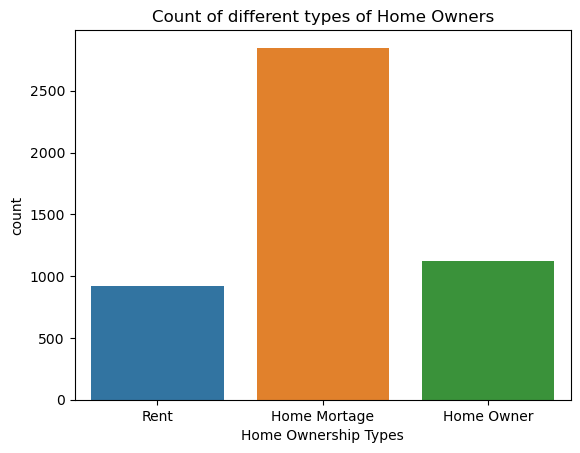

In [33]:
category_labels = ['Rent', 'Home Mortage', 'Home Owner']
sns.countplot(x='Home Ownership', data=df)
plt.title("Count of different types of Home Owners")
plt.xlabel("Home Ownership Types")
plt.xticks(ticks=[0, 1, 2], labels=category_labels) 
plt.show()

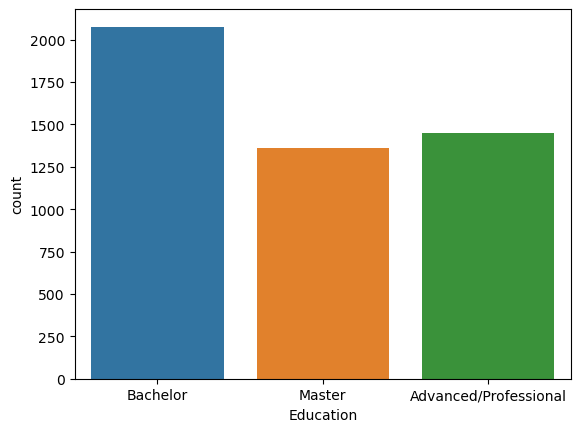

In [34]:
category_labels = ['Bachelor', 'Master', 'Advanced/Professional']
sns.countplot(x='Education', data=df)
plt.xticks(ticks=[0, 1, 2], labels=category_labels) 
plt.show()

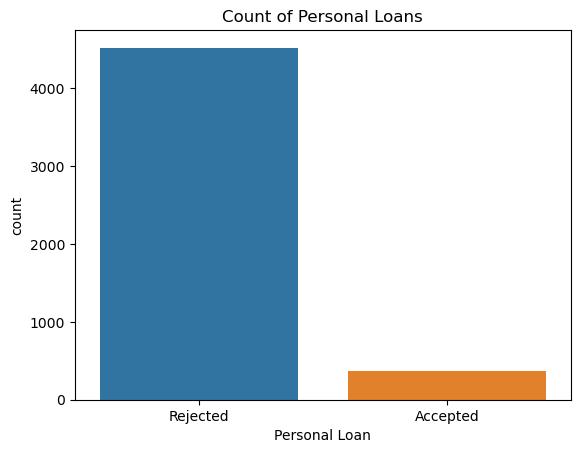

In [35]:
category_labels = ['Rejected', 'Accepted']
sns.countplot(x='Personal Loan', data=df)
plt.title("Count of Personal Loans")
plt.xticks(ticks=[0, 1], labels=category_labels) 
plt.show()

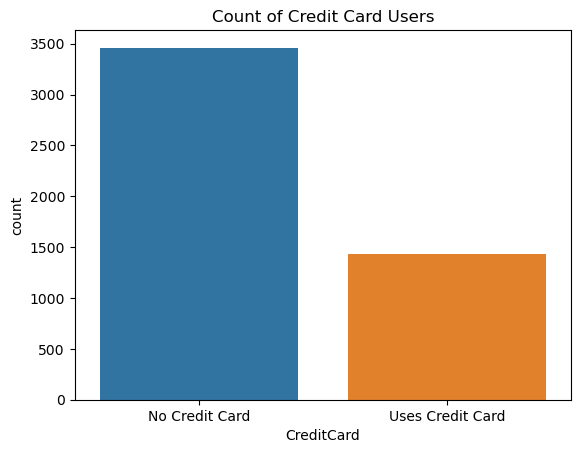

In [36]:
category_labels = ['No Credit Card', 'Uses Credit Card']
sns.countplot(x='CreditCard', data=df)
plt.title("Count of Credit Card Users")
plt.xticks(ticks=[0, 1], labels=category_labels) 
plt.show()

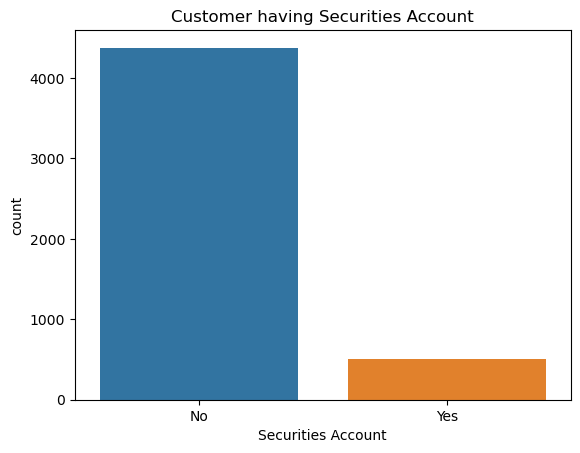

In [37]:
category_labels = ['No', 'Yes']
sns.countplot(x='Securities Account', data=df)
plt.title("Customer having Securities Account")
plt.xticks(ticks=[0, 1], labels=category_labels) 
plt.show()

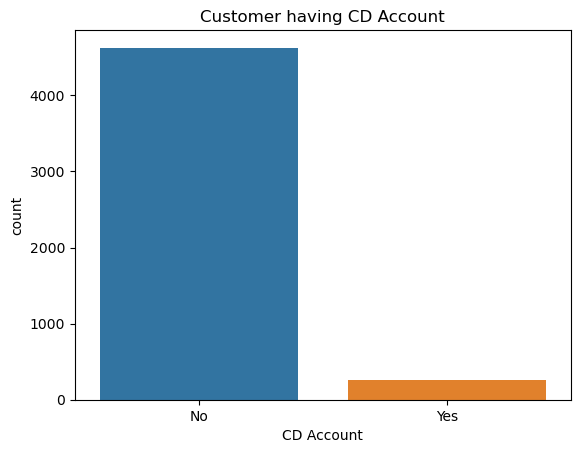

In [38]:
category_labels = ['No', 'Yes']
sns.countplot(x='CD Account', data=df)
plt.title("Customer having CD Account")
plt.xticks(ticks=[0, 1], labels=category_labels) 
plt.show()

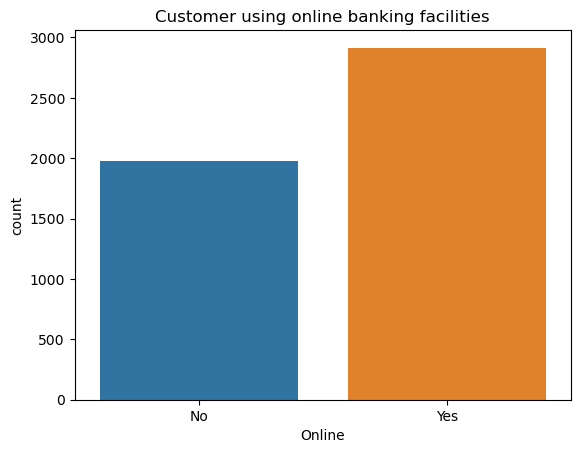

In [39]:
category_labels = ['No', 'Yes']
sns.countplot(x='Online', data=df)
plt.title("Customer using online banking facilities")
plt.xticks(ticks=[0, 1], labels=category_labels) 
plt.show()

### for numerical features

<Axes: xlabel='Age', ylabel='Count'>

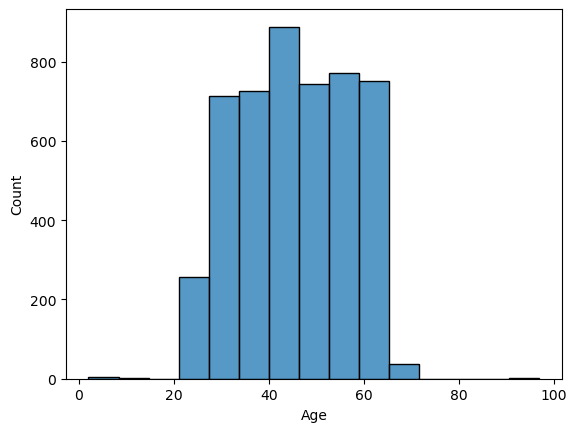

In [40]:
sns.histplot(x="Age", data=df, bins= 15)

This graph shows that the number of customer widely range between age 20-70.

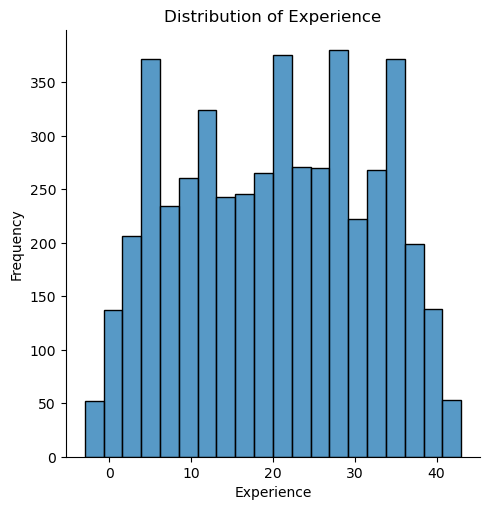

In [41]:
sns.displot(x="Experience", data=df)
plt.title("Distribution of Experience")
plt.xlabel("Experience")
plt.ylabel("Frequency")
plt.show()

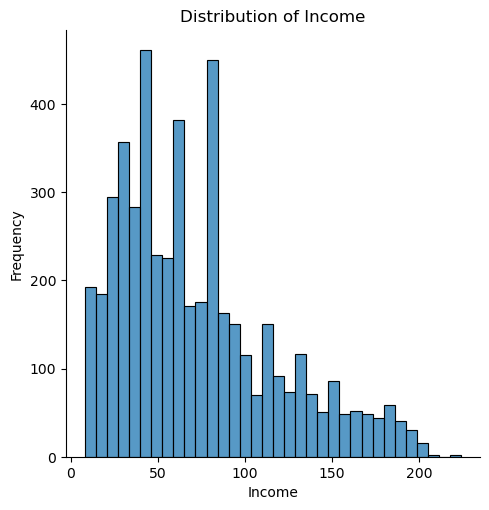

In [42]:
sns.displot(x="Income", data=df)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

<Axes: >

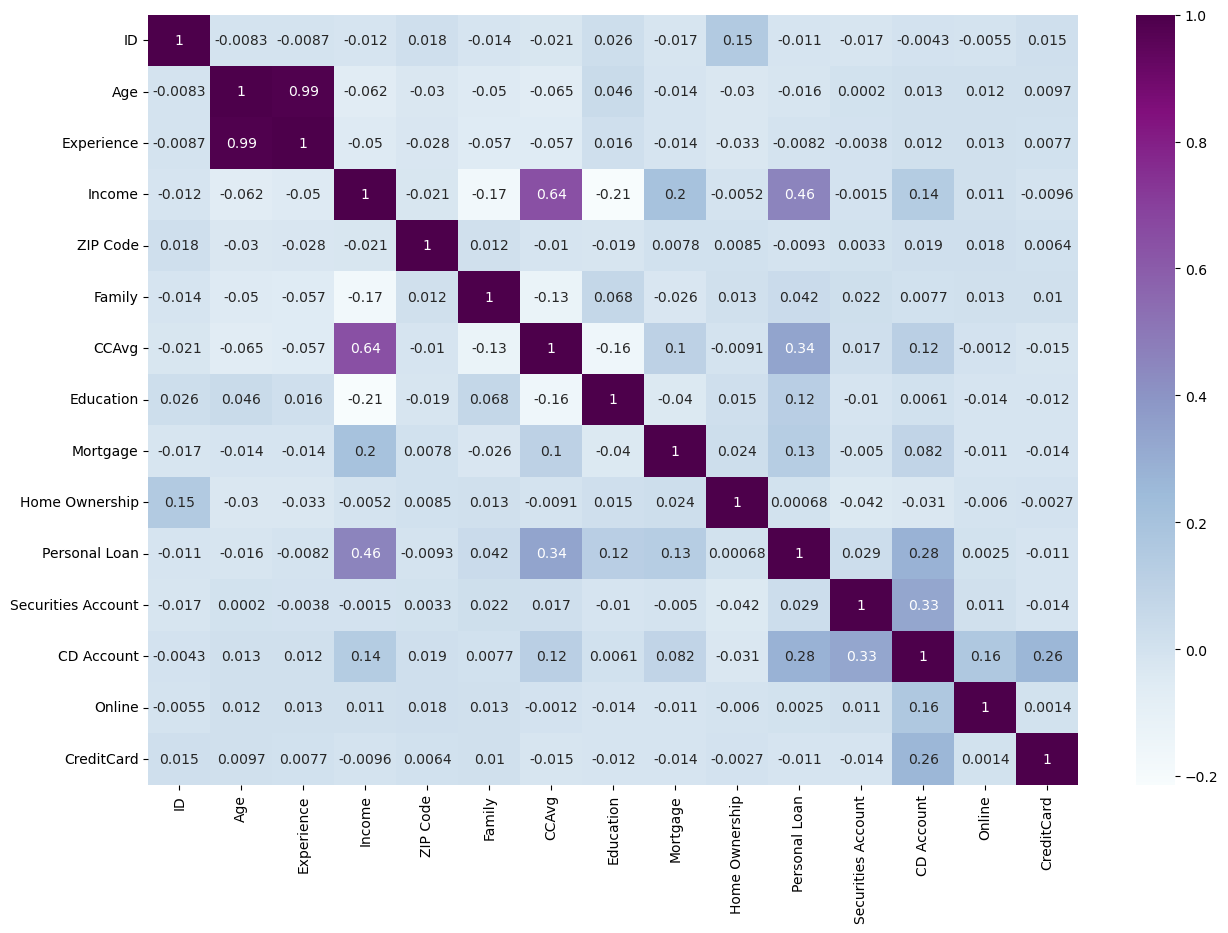

In [43]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="BuPu")

Since the age and experience columns are highly correlated with each other we drop one column.

In [44]:
df.drop('Experience', axis=1, inplace=True)
df.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,2,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,0,1


### Storing Feature variable in X and Target Variable in Y

In [45]:
X = df.drop('Personal Loan', axis=1)
X.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,2,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [46]:
Y = df['Personal Loan']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

### Feature Engineering

#### Feature Scaling

In [47]:
col = ['Age','Income','ZIP Code']

In [48]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X[col] = st.fit_transform(X[col])

In [49]:
X

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,1,-1.759365,-0.513618,-0.959261,4,1.6,1,0,2,1,0,0,0
1,2,-0.027001,-0.846821,-1.438161,3,1.5,1,0,0,1,0,0,0
2,3,-0.546710,-1.357731,0.740408,1,1.0,1,0,0,0,0,0,0
3,4,-0.893183,0.619270,0.454386,1,2.7,2,0,0,0,0,0,0
4,5,-0.893183,-0.602472,-0.854355,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-1.412892,-0.713540,-0.211275,1,1.9,3,0,1,0,0,1,0
4996,4997,-1.326274,-1.268877,-0.521760,4,0.4,1,85,1,0,0,1,0
4997,4998,1.532127,-1.068955,-0.057914,2,0.3,3,0,1,0,0,0,0
4998,4999,1.705363,-0.513618,-1.464034,3,0.5,2,0,1,0,0,1,0


## Splitting data into train and test data

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [51]:
model_df = {}
def model_val(model,X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(f"{model} accuracy: {accuracy_score(Y_test,y_pred)}")
    
    score = cross_val_score(model, X, Y, cv=5)
    print(f"{model} Average cross value score: {np.mean(score)}")
    model_df[model] = round(np.mean(score)*100,2)

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_val(model,X,Y)

/Users/luni/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/luni/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

LogisticRegression() accuracy: 0.941717791411043
LogisticRegression() Average cross value score: 0.930868879944239


/Users/luni/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/luni/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [53]:
model_df

{LogisticRegression(): 93.09}

### SVM

In [54]:
from sklearn import svm

model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy: 0.9335378323108384
SVC() Average cross value score: 0.9247290964159305


In [55]:
model_df

{LogisticRegression(): 93.09, SVC(): 92.47}

### Decision Tree 

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy: 0.9785276073619632
DecisionTreeClassifier() Average cross value score: 0.9789330469929022


### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy: 0.9805725971370143
RandomForestClassifier() Average cross value score: 0.9862956381226281


In [58]:
model_df

{LogisticRegression(): 93.09,
 SVC(): 92.47,
 DecisionTreeClassifier(): 97.89,
 RandomForestClassifier(): 98.63}

### Hypertuning 

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
            'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
            'decisiontreeclassifier__criterion': ["gini", "entropy"]
        }
    }
}

In [77]:
scores = []
best_estimators = {}
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
model_data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_data   

,model,best_score,best_params
0,svm,0.975455,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.983634,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.956536,{'logisticregression__C': 1}
3,decision_tree,0.986447,"{'decisiontreeclassifier__criterion': 'gini', ..."


### Saving the model

In [80]:
model_data.loc[3,'best_params']

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 5}

In [81]:
rf = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth =  3,
    min_samples_leaf = 5)

In [82]:
rf.fit(X,Y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [83]:
import joblib

In [84]:
joblib.dump(rf,'Personal_loan_predict')

['Personal_loan_predict']

### Loading the model

In [85]:
loan_model = joblib.load('Personal_loan_predict')

### Prediction using the loaded model

In [88]:
data = pd.DataFrame({
    'ID': 24,
    'Age': 31,
    'Income': 70,
    'ZIP Code': 4600,
    'Family': 3,
    'CCAvg': 1.0,
    'Education': 2,
    'Mortgage': 0,
    'Home Ownership': 1,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1
},index=[0])

In [89]:
data

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,24,31,70,4600,3,1.0,2,0,1,1,0,1,1


In [91]:
result = model.predict(data)
if result == 1:
    print('Personal Loan Accepted.')
else:
    print('Personal Loan Not Accepted.')

Personal Loan Accepted.
